In [ ]:
!nvidia-smi


Thu Aug 28 12:19:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install -q ultralytics
from ultralytics import YOLO
import os, zipfile


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import files

uploaded = files.upload()   # burada dataset.zip dosyanı seçiyoruz
zip_name = list(uploaded.keys())[0]

# Çıkartılacak klasör
DATA_DIR = "/content/dataset"
os.makedirs(DATA_DIR, exist_ok=True)

with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall(DATA_DIR)

os.chdir(DATA_DIR)
print("PWD:", os.getcwd())

# data.yaml dosyası var mı kontrol ediyoruz 
!cat data.yaml


Saving stop-sign-detection.v3i.yolov8.zip to stop-sign-detection.v3i.yolov8.zip
PWD: /content/dataset
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['stop']

roboflow:
  workspace: losceret
  project: stop-sign-detection-mypfl
  version: 3
  license: CC BY 4.0
  url: https://universe.roboflow.com/losceret/stop-sign-detection-mypfl/dataset/3

In [ ]:
model = YOLO("yolov8n.pt")  # Nano model (hızlı)

results = model.train(
    data="data.yaml",
    epochs=100,        # 50–100 arası ideal (veri az)
    imgsz=640,
    batch=16,
    patience=20,       # erken durdurma (20 kere aynı % olursa duracak)
    device=0           # GPU
)


Ultralytics 8.3.188 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, 

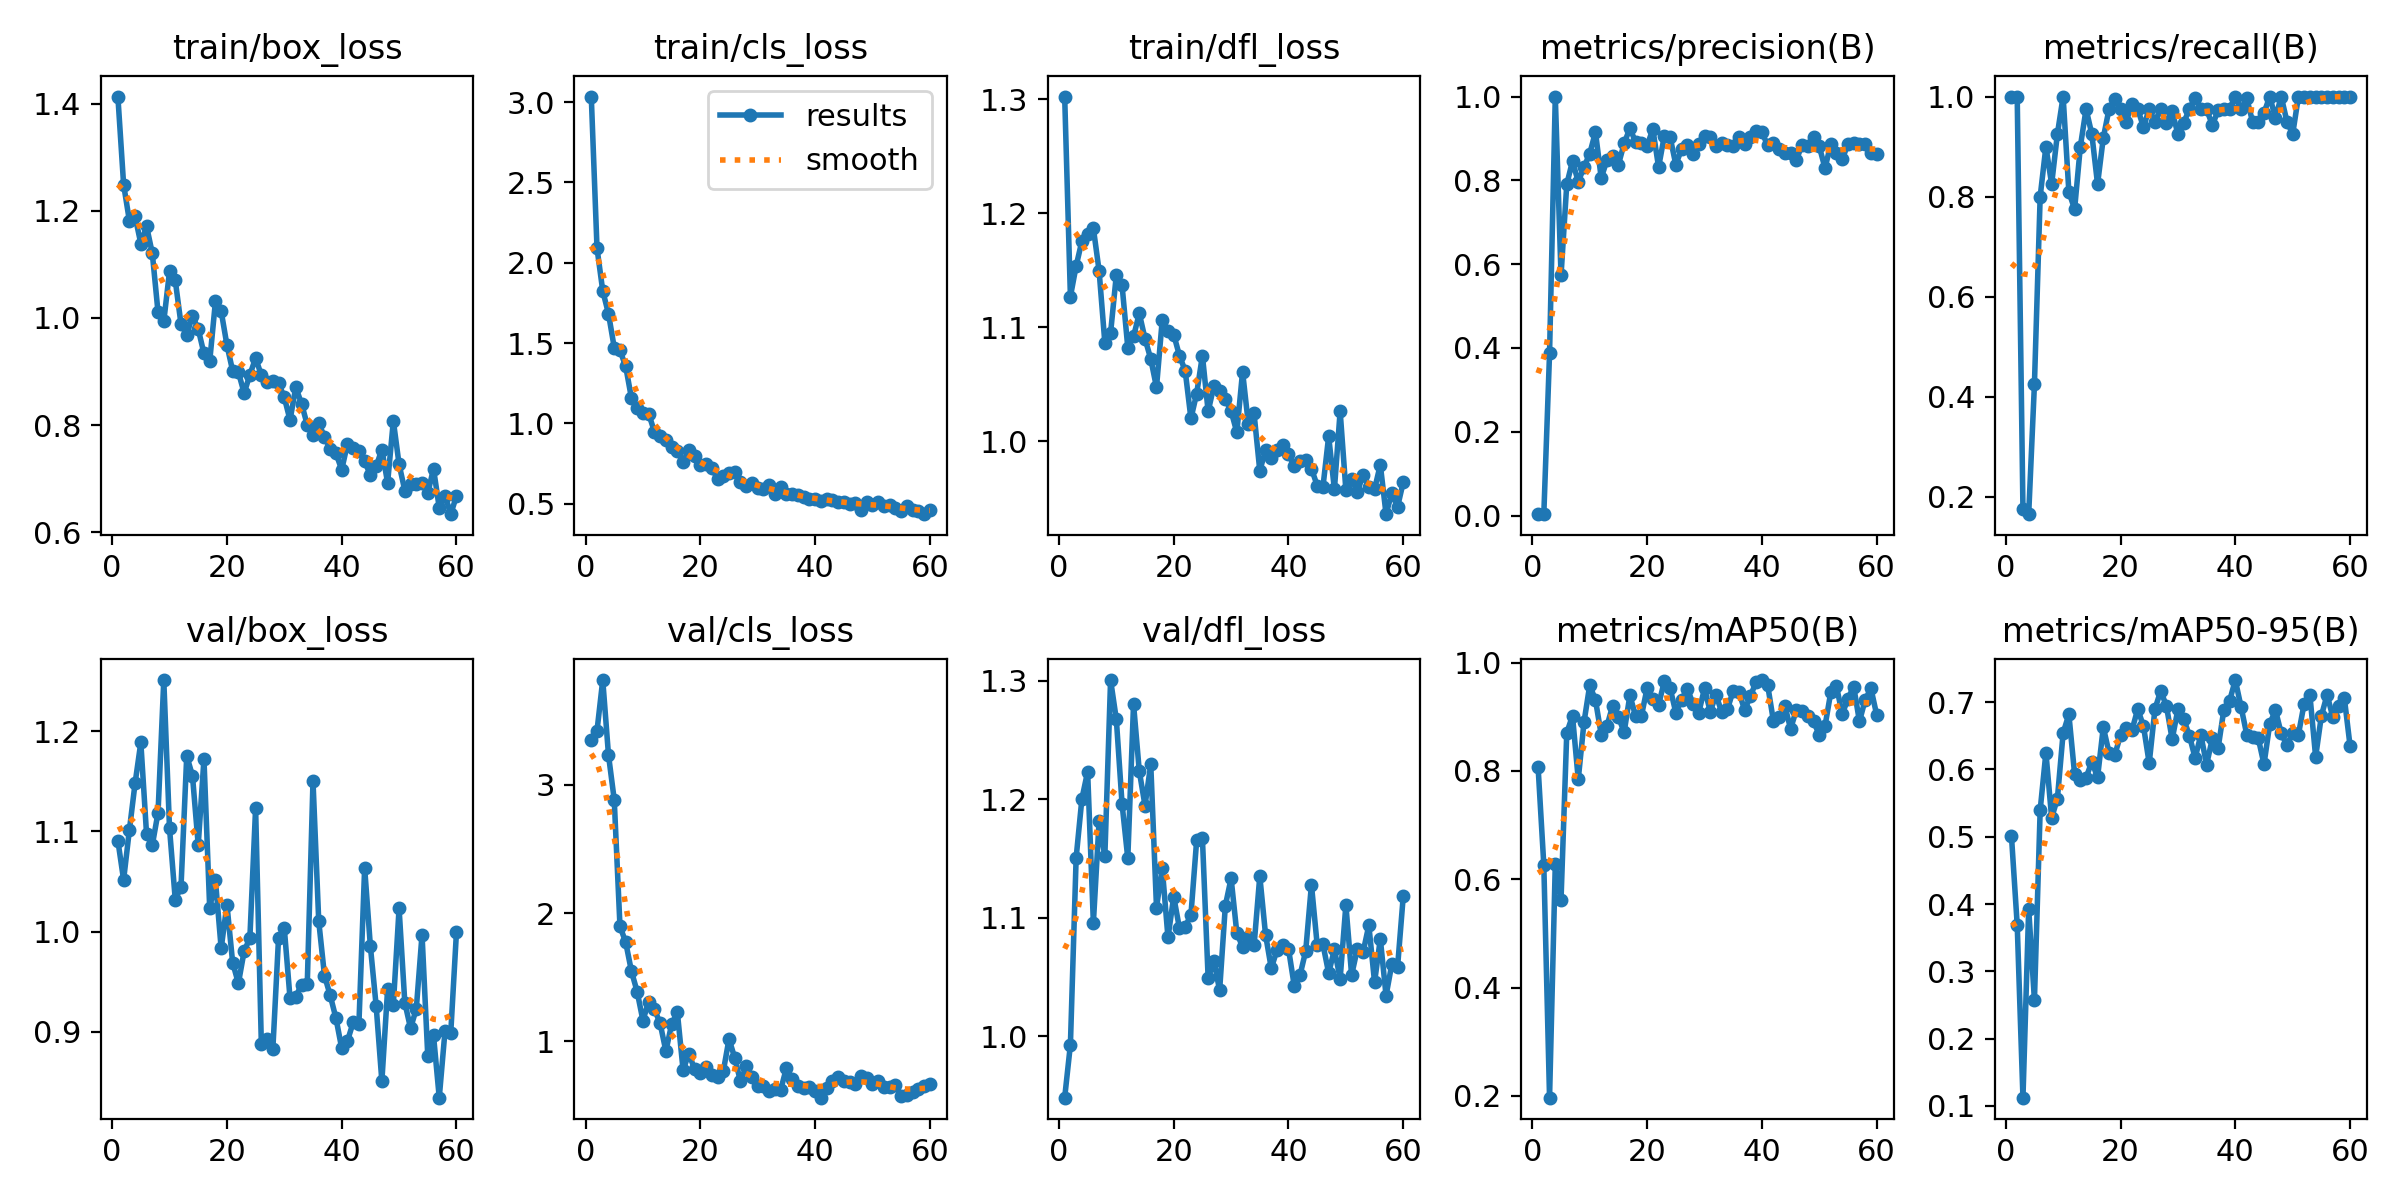

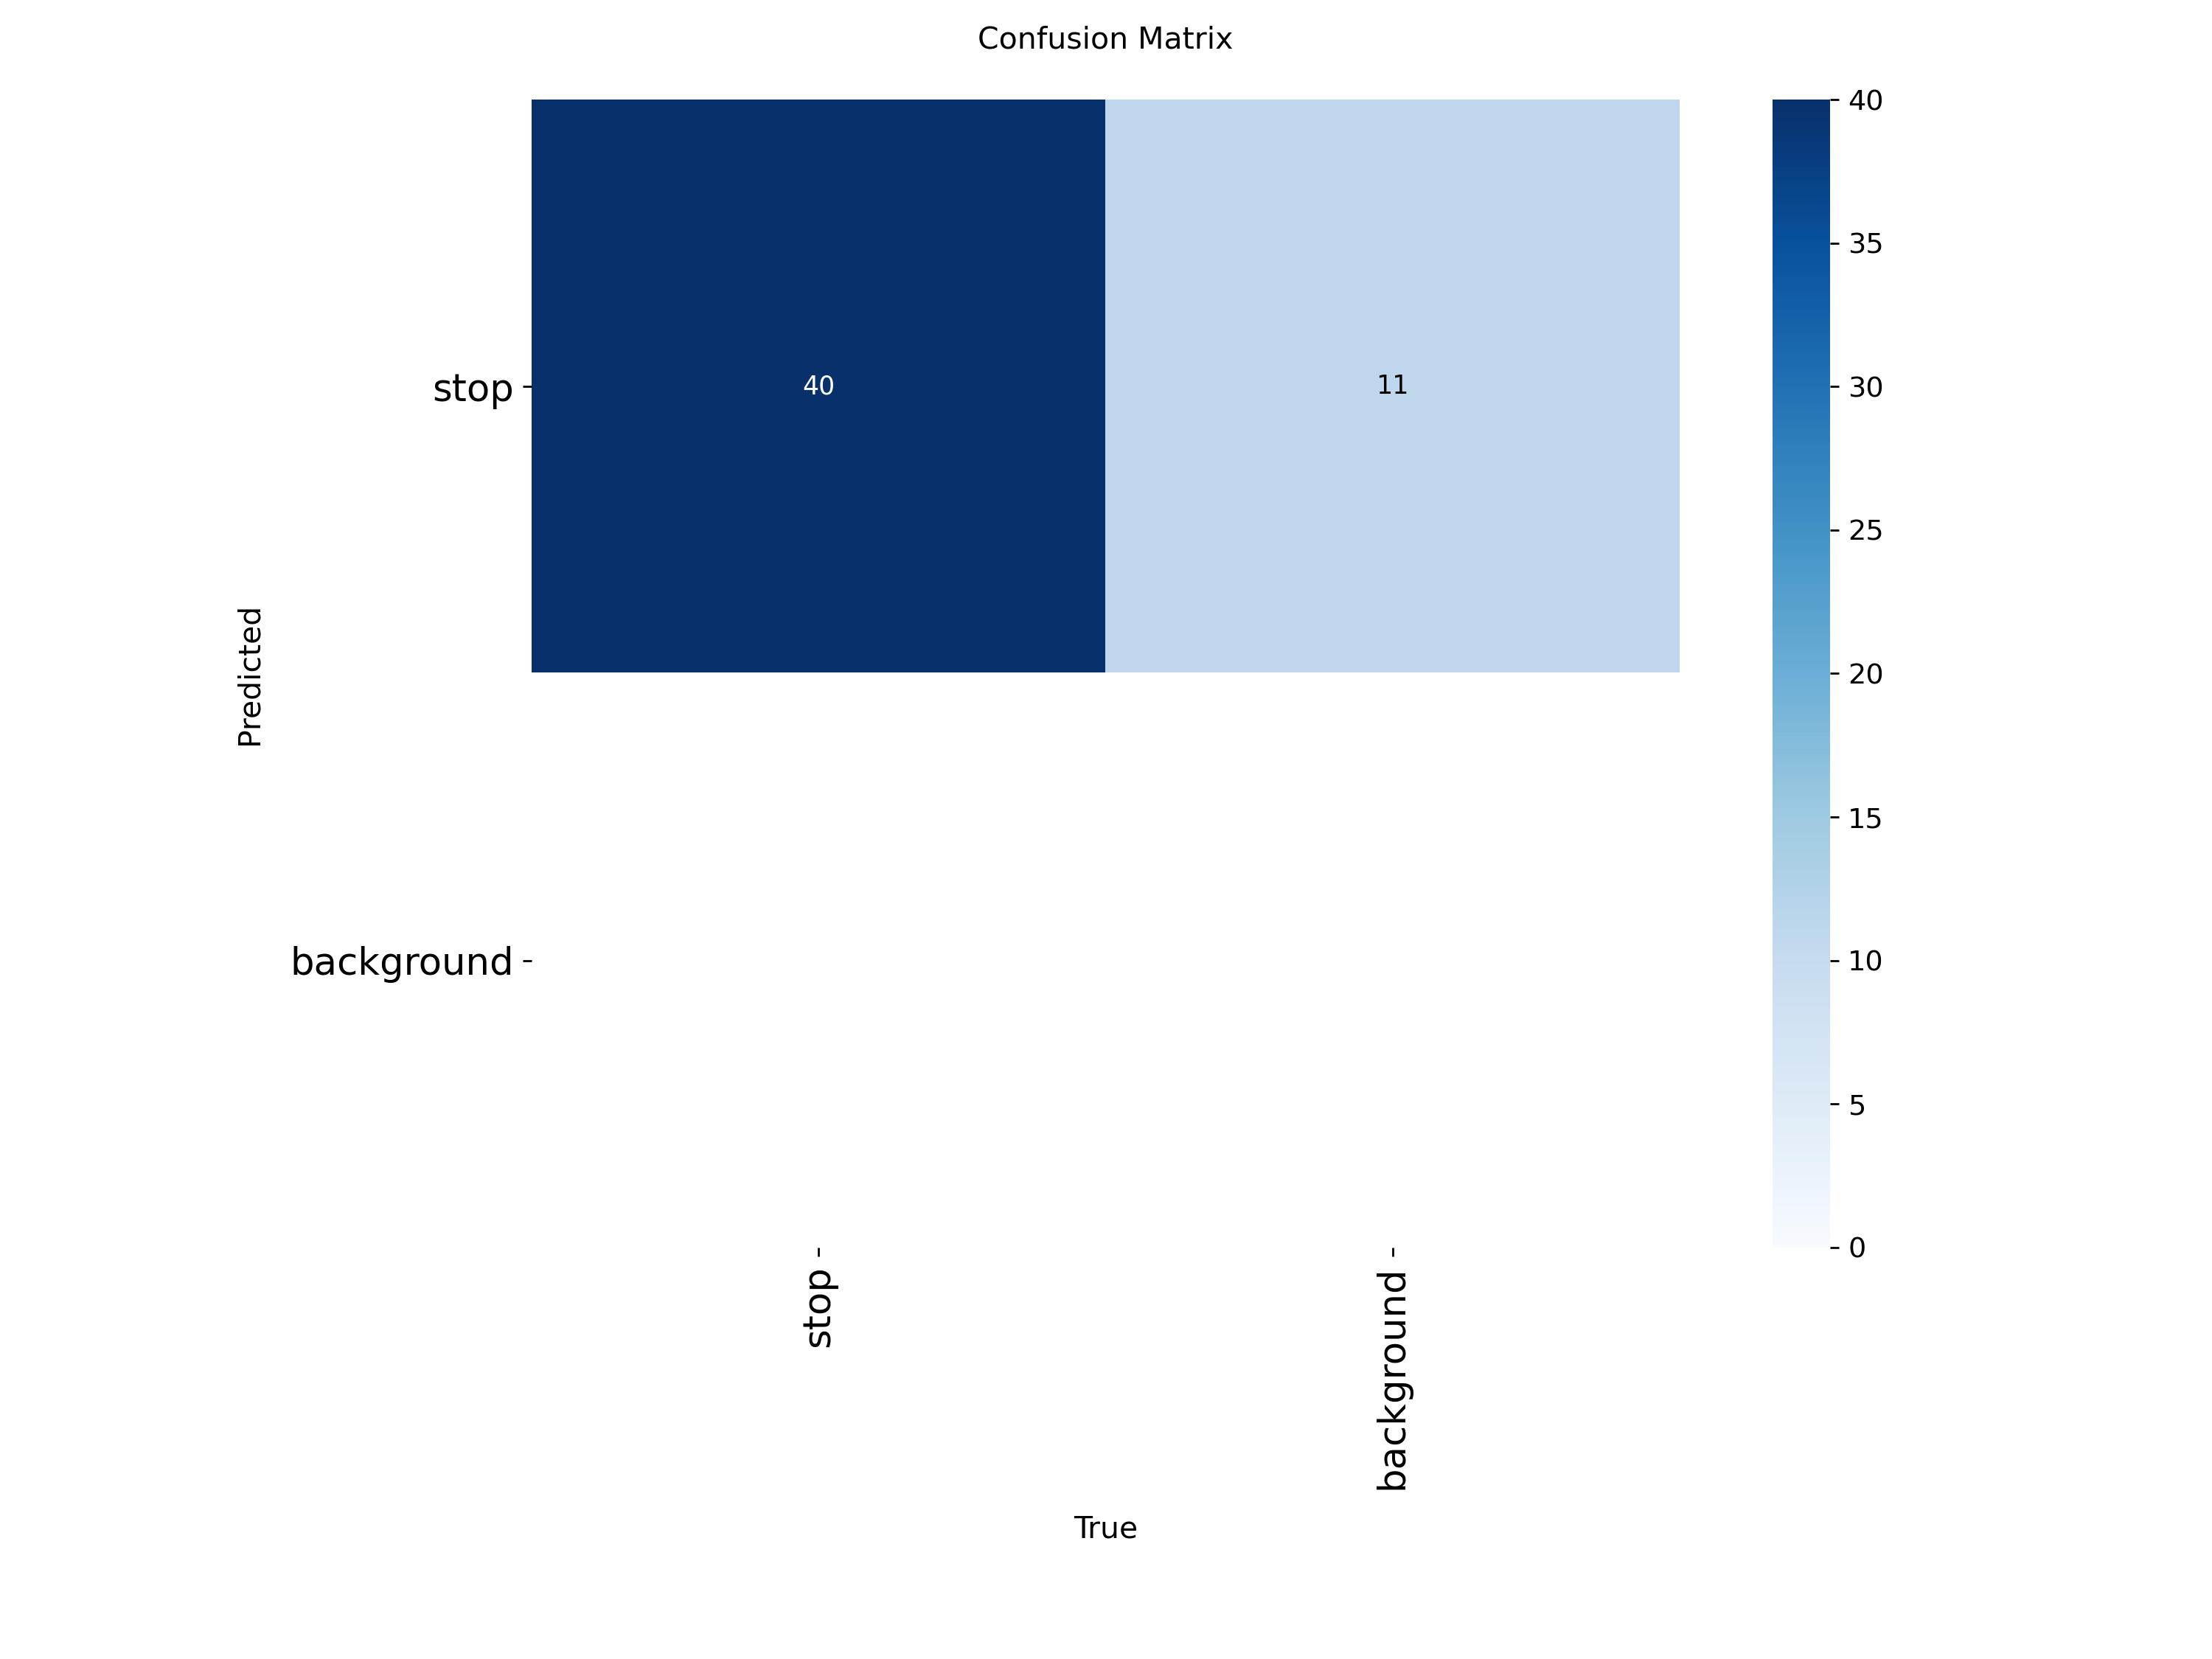

Bulunamadı: runs/detect/train/PR_curve.png
Bulunamadı: runs/detect/train/F1_curve.png


In [ ]:
import os
from IPython.display import Image, display

run_dir = 'runs/detect/train'  # Eğitim çıktılarının olduğu klasör

to_show = [
    f'{run_dir}/results.png',          # Loss, mAP, Precision-Recall grafikleri
    f'{run_dir}/confusion_matrix.png', # Karışıklık matrisi
    f'{run_dir}/PR_curve.png',         # Precision-Recall eğrisi
    f'{run_dir}/F1_curve.png',         # F1-score eğrisi
]

for p in to_show:
    if os.path.exists(p):
        display(Image(filename=p))
    else:
        print('Bulunamadı:', p)


In [ ]:
MODEL_PATH = "runs/detect/train/weights/best.pt"


In [ ]:
from google.colab import files
import os, shutil

# Test klasörü oluşturma (kontrol edilecek görseller için)
INFER_DIR = "inference_images"
shutil.rmtree(INFER_DIR, ignore_errors=True)
os.makedirs(INFER_DIR, exist_ok=True)

# Bilgisayardan dosya / görselleri seçip ve yükleme
uploaded = files.upload()
for fname in uploaded.keys():
    shutil.move(fname, os.path.join(INFER_DIR, fname))

print("Yüklü dosyalar:", os.listdir(INFER_DIR))


Saving photo-1558626219-fa0c107b5613.jpg to photo-1558626219-fa0c107b5613.jpg
Saving photo-1518749031467-bb37f48aee10.jpg to photo-1518749031467-bb37f48aee10.jpg
Saving photo-1635481585588-2440d43b6747.jpg to photo-1635481585588-2440d43b6747.jpg
Saving photo-1727156275339-aad186798856.jpg to photo-1727156275339-aad186798856.jpg
Saving premium_photo-1731192705955-f10a8e7174d2.jpg to premium_photo-1731192705955-f10a8e7174d2.jpg
Yüklü dosyalar: ['photo-1635481585588-2440d43b6747.jpg', 'photo-1558626219-fa0c107b5613.jpg', 'premium_photo-1731192705955-f10a8e7174d2.jpg', 'photo-1727156275339-aad186798856.jpg', 'photo-1518749031467-bb37f48aee10.jpg']



image 1/5 /content/dataset/inference_images/photo-1518749031467-bb37f48aee10.jpg: 448x640 1 stop, 40.1ms
image 2/5 /content/dataset/inference_images/photo-1558626219-fa0c107b5613.jpg: 448x640 1 stop, 6.2ms
image 3/5 /content/dataset/inference_images/photo-1635481585588-2440d43b6747.jpg: 416x640 1 stop, 40.8ms
image 4/5 /content/dataset/inference_images/photo-1727156275339-aad186798856.jpg: 480x640 1 stop, 55.4ms
image 5/5 /content/dataset/inference_images/premium_photo-1731192705955-f10a8e7174d2.jpg: 448x640 1 stop, 7.0ms
Speed: 2.4ms preprocess, 29.9ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
Sonuç klasörü: runs/detect/predict


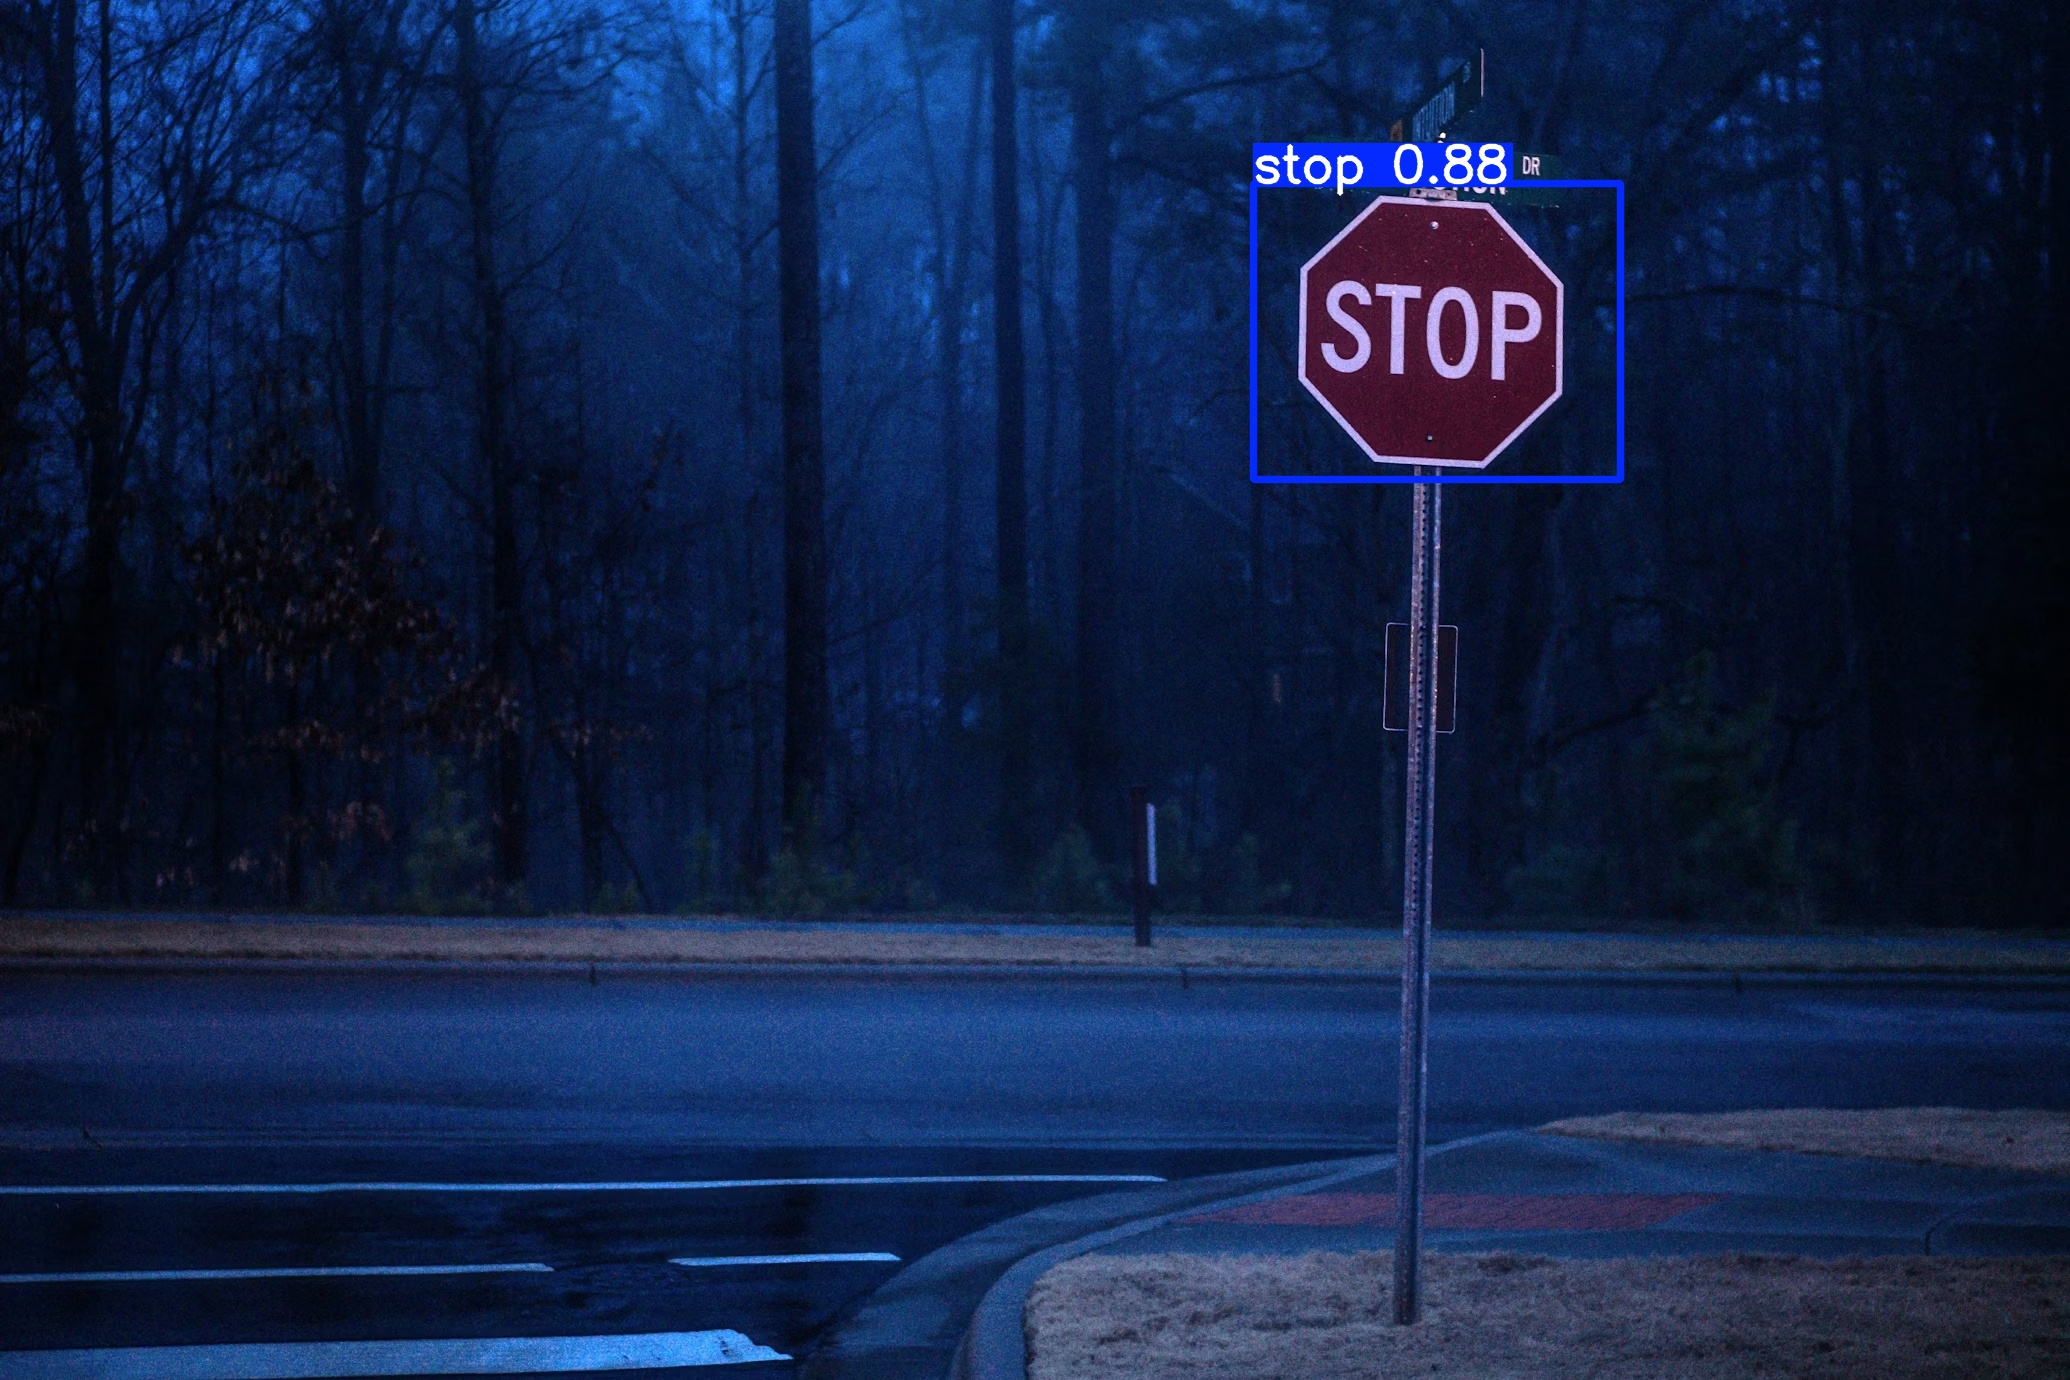

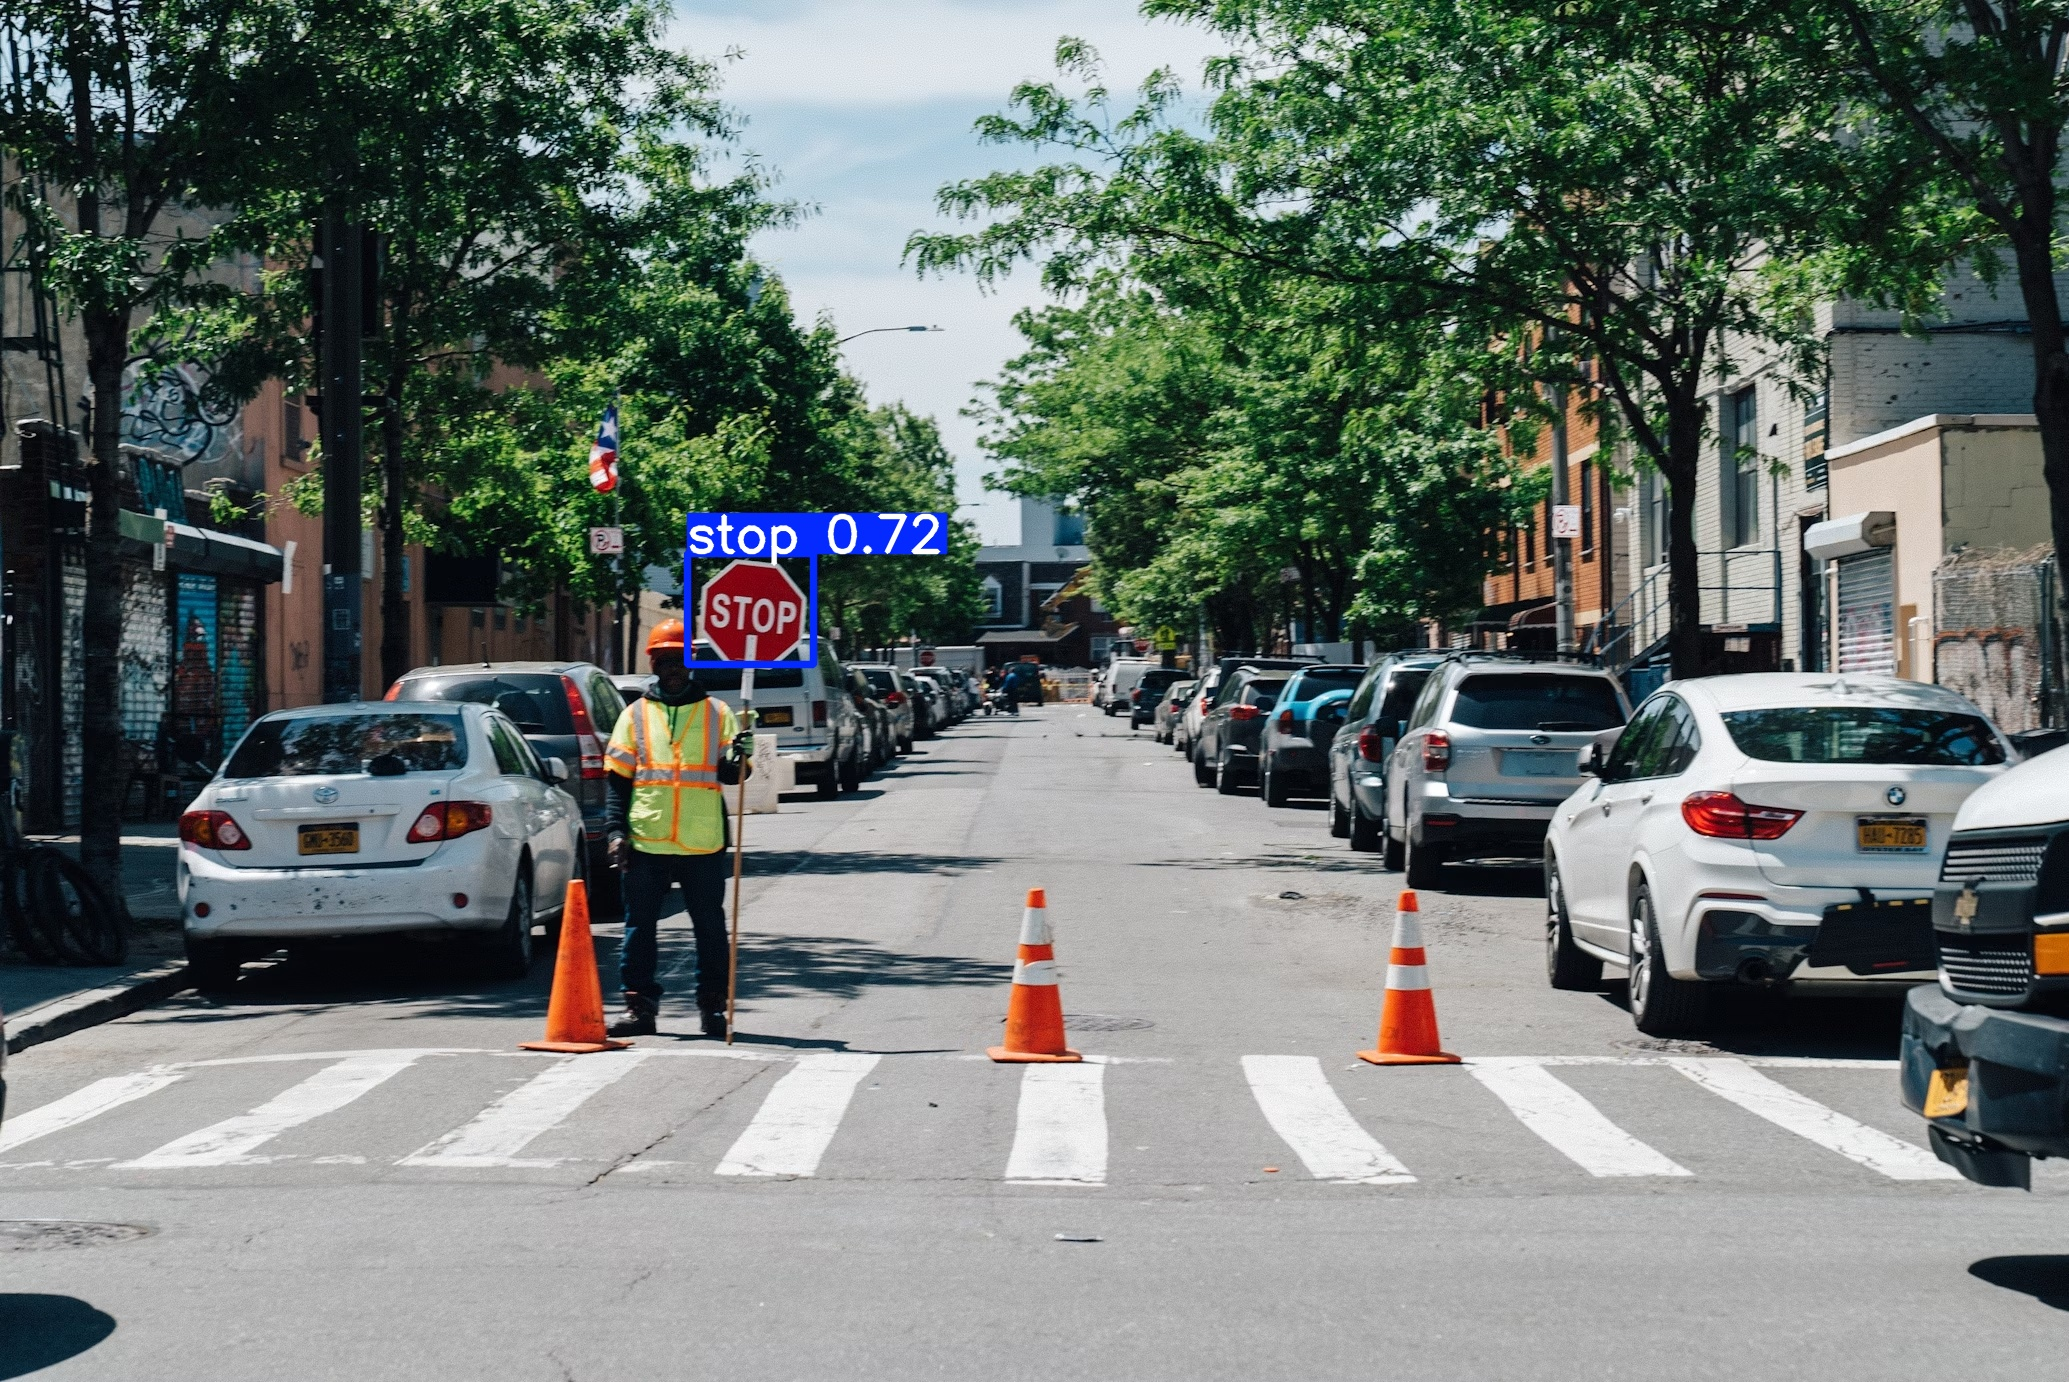

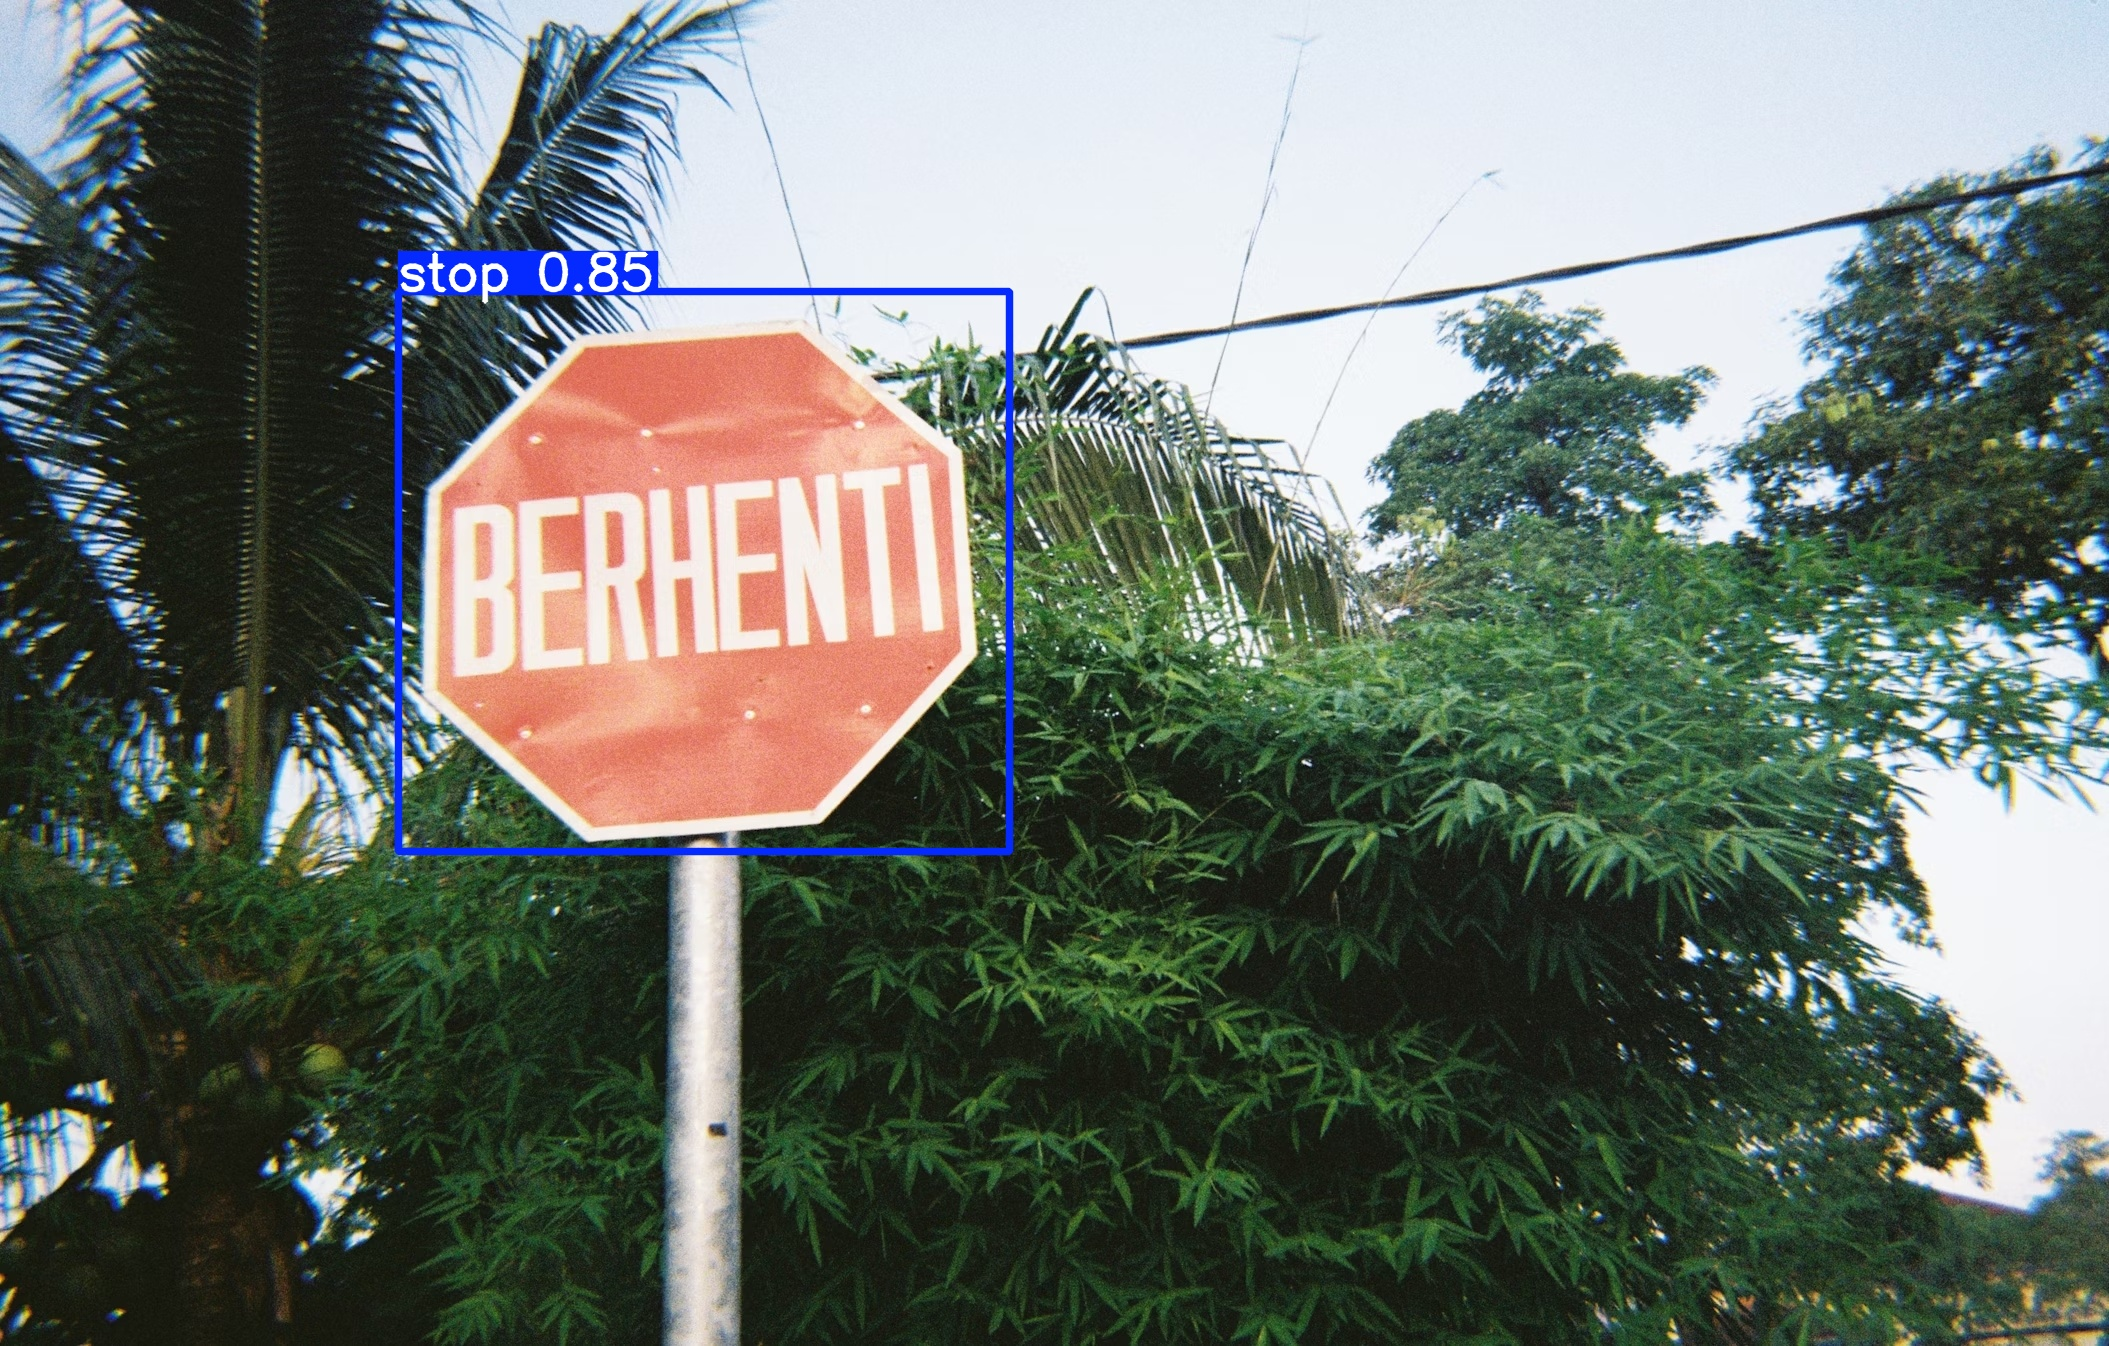

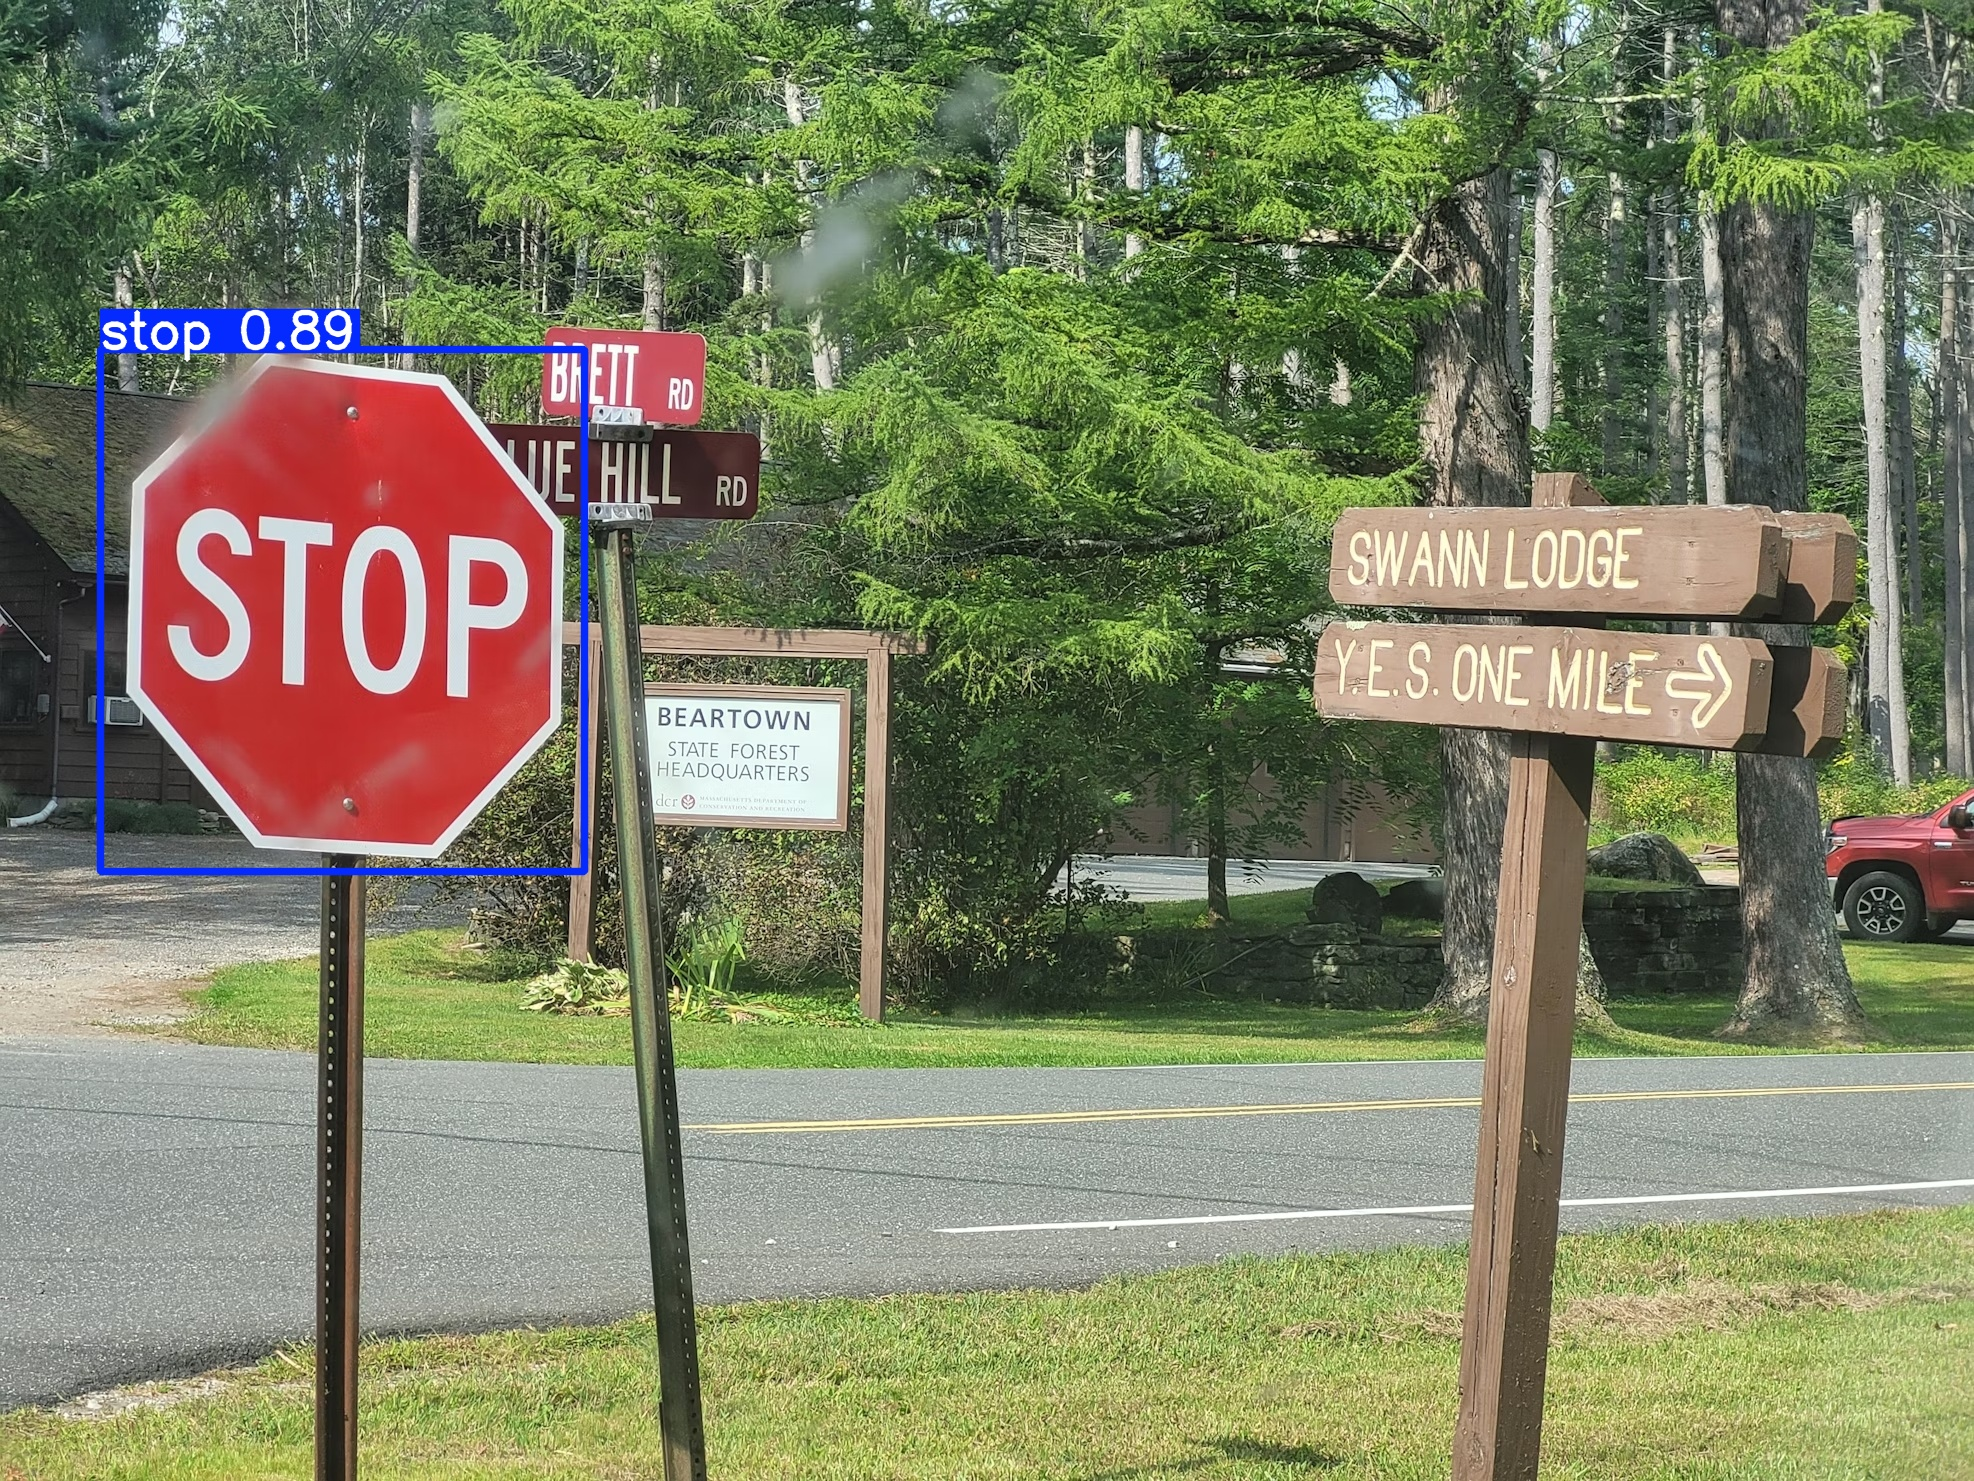

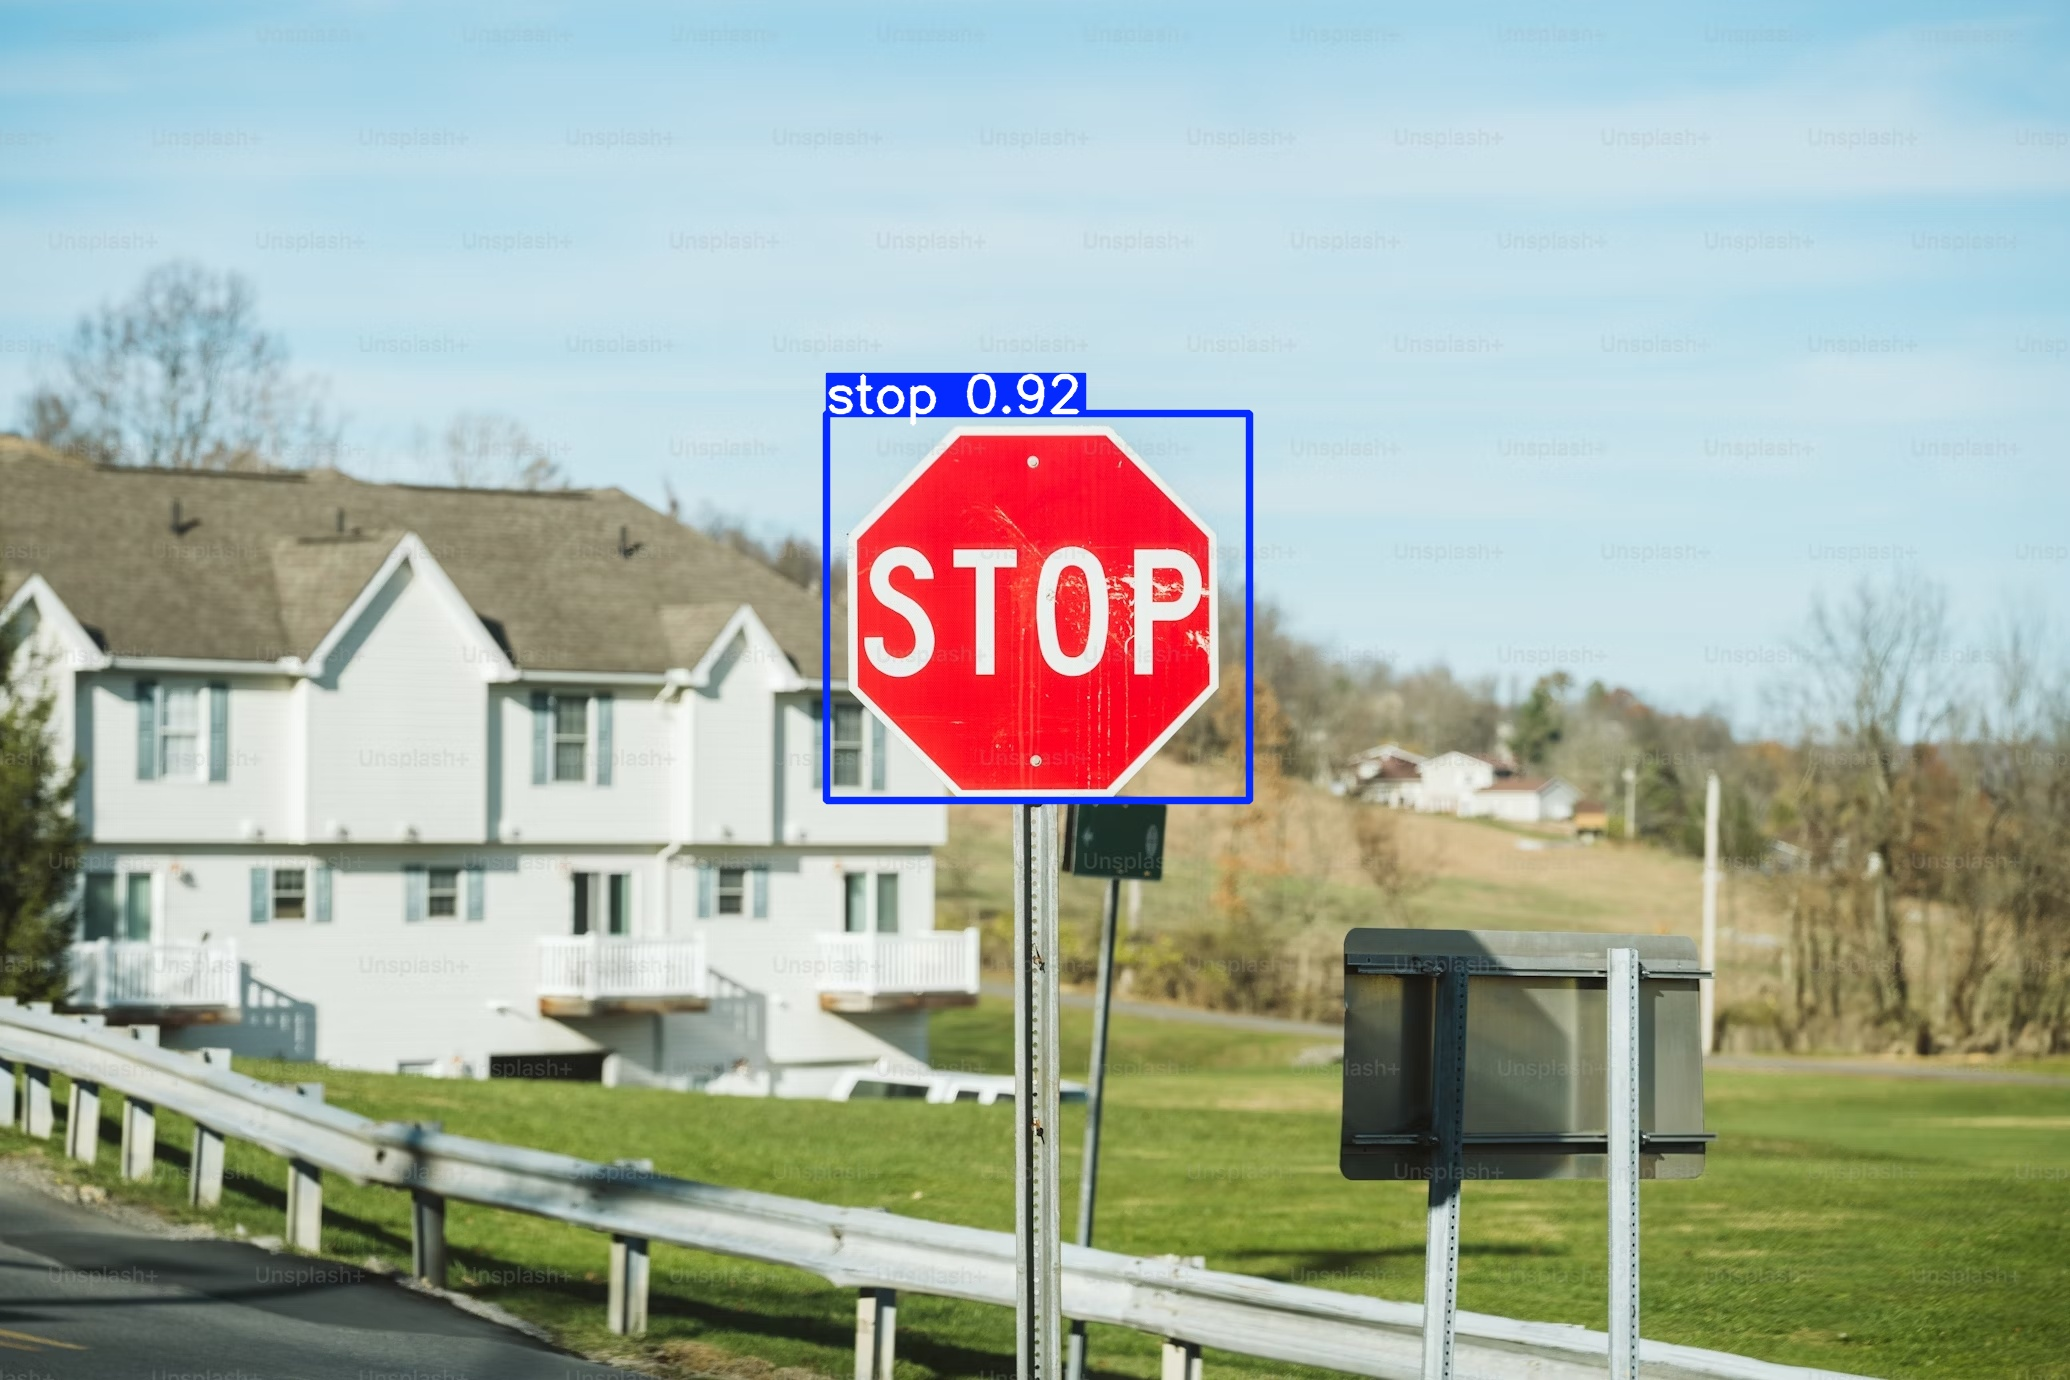

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display
import glob

# Modeli yükle
model = YOLO(MODEL_PATH)

# Prediction
results = model.predict(
    source=INFER_DIR,
    conf=0.25,   
    imgsz=640,
    save=True
)

# Çıktıların gösterilmesi
pred_dir = results[0].save_dir
print("Sonuç klasörü:", pred_dir)

pred_imgs = sorted(glob.glob(os.path.join(pred_dir, "*.jpg")))
for p in pred_imgs:
    display(Image(filename=p))
